## Decision Tree Classifier Example

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

### Importing and Exploring the Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Maze/Decision Tree Classifier/heart_disease_dataset.csv")

# display first few rows of data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# dataframe shape
df.shape

(918, 12)

In [ ]:
# check for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# dataframe statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


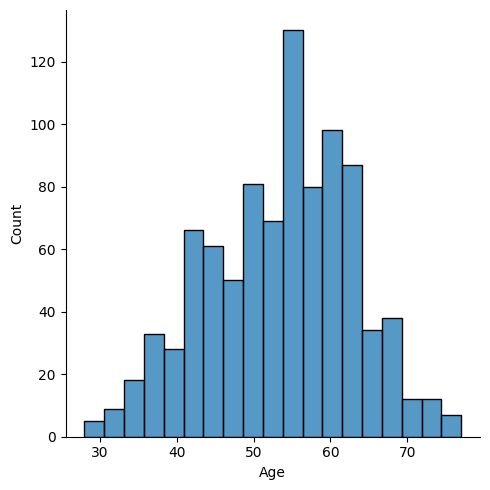

In [ ]:
# age distribution
ax = sns.displot(data = df, x="Age")

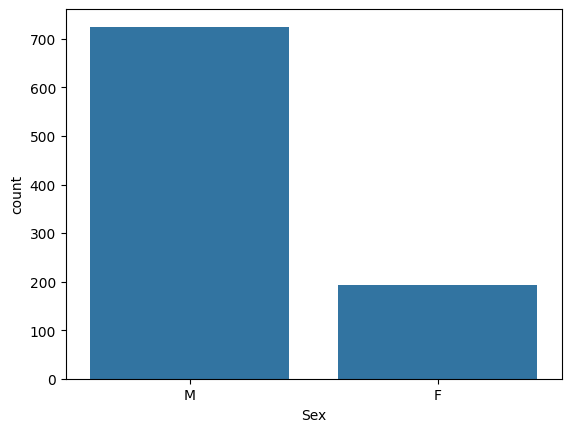

In [ ]:
# gender distribution
ax = sns.countplot(data=df, x="Sex",)

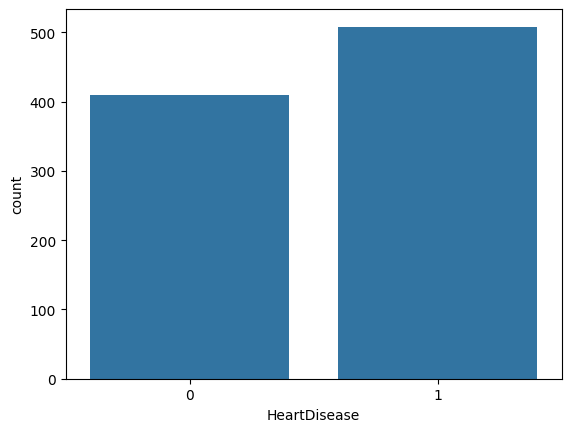

In [ ]:
# heart disease (target) distribution
ax = sns.countplot(data=df, x="HeartDisease",)

### Data Preprocessing

#### Label Encoding

In [ ]:
# label encoding sex
df['Sex'] = df['Sex'].replace(['M','F'],['0','1'])

# label encoding exercise Angina
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N','Y'],['0','1'])

#### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

# define input and target variable
X = df[["Age","Sex","RestingBP", "Cholesterol", "FastingBS", "MaxHR", "ExerciseAngina"]]
y = df.HeartDisease

# splitting test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state=42)

### Fitting the Decision Tree Classifier

In [ ]:
from sklearn import tree

# define classification algorithm
# max_depth = 2, the tree isnt going beyond two levels
dt_clf = tree.DecisionTreeClassifier(max_depth = 2, criterion = "entropy")
dt_clf = dt_clf.fit(X_train, y_train)

# generating predictions
y_pred = dt_clf.predict(X_test)

### Plotting the Decision Tree

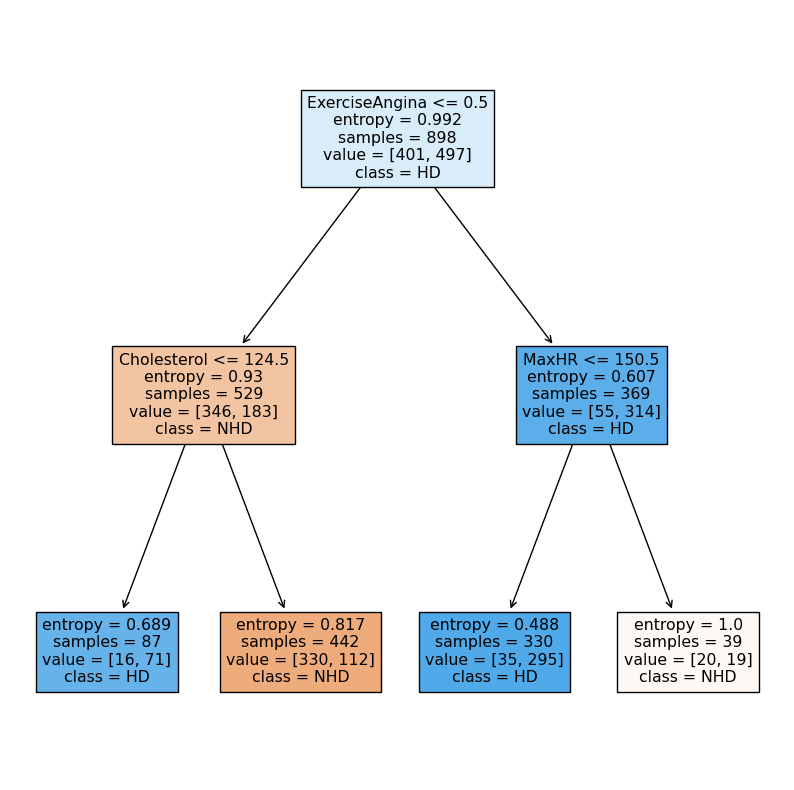

In [ ]:
feature_names = ["Age","Sex","RestingBP", "Cholesterol", "FastingBS", "MaxHR", "ExerciseAngina"]
class_names = ["NHD", "HD"]
# class_names = ["HeartDisease"]

fig = plt.figure(figsize=(10,10))
plot = tree.plot_tree(dt_clf,
               feature_names=feature_names,
               class_names=class_names,
               filled=True)

### Model Evaluation

In [ ]:
y_test.shape

(20,)

In [ ]:
# f1 score
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7058823529411764

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.75

In [ ]:
# precision
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

1.0

In [ ]:
# recall
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.5454545454545454